In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
data=pd.read_csv("consommation_energie.csv",index_col=0, parse_dates=True)
data.head()


,Consommation
Date,
2024-01-01,87.854994
2024-01-02,130.140824
2024-01-03,55.271927
2024-01-04,82.344432
2024-01-05,126.522065


In [96]:
data.shape

(366, 1)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Consommation  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [98]:
data.isnull().sum()


Consommation    0
dtype: int64

<Axes: xlabel='Date'>

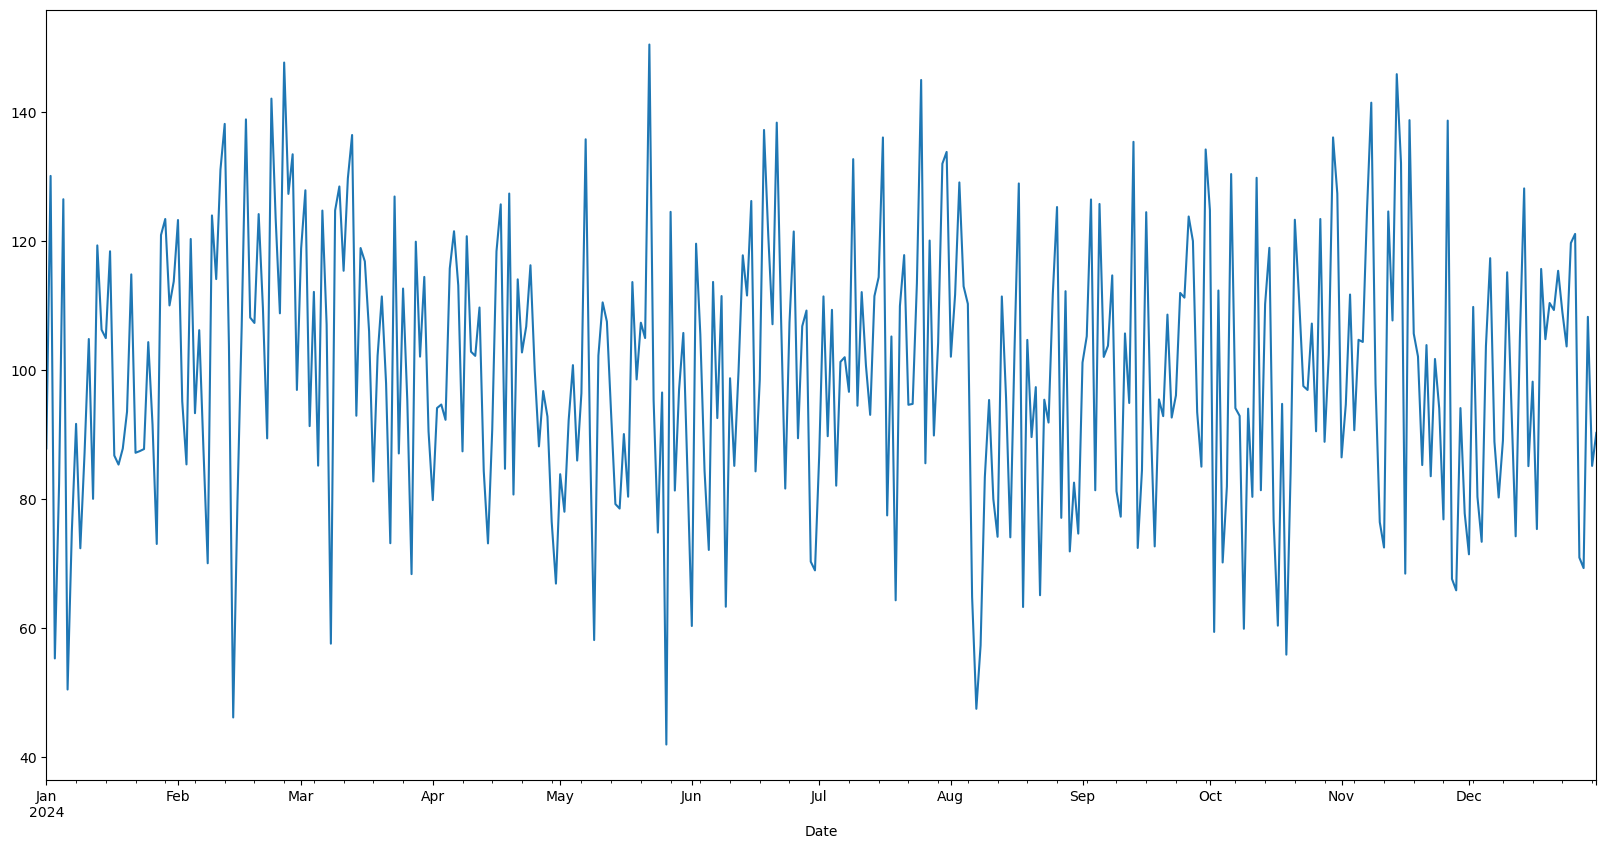

In [99]:
data['Consommation'].plot(figsize=(20,10))

In [87]:
monthly_avg_consumption = data.resample('M').mean()


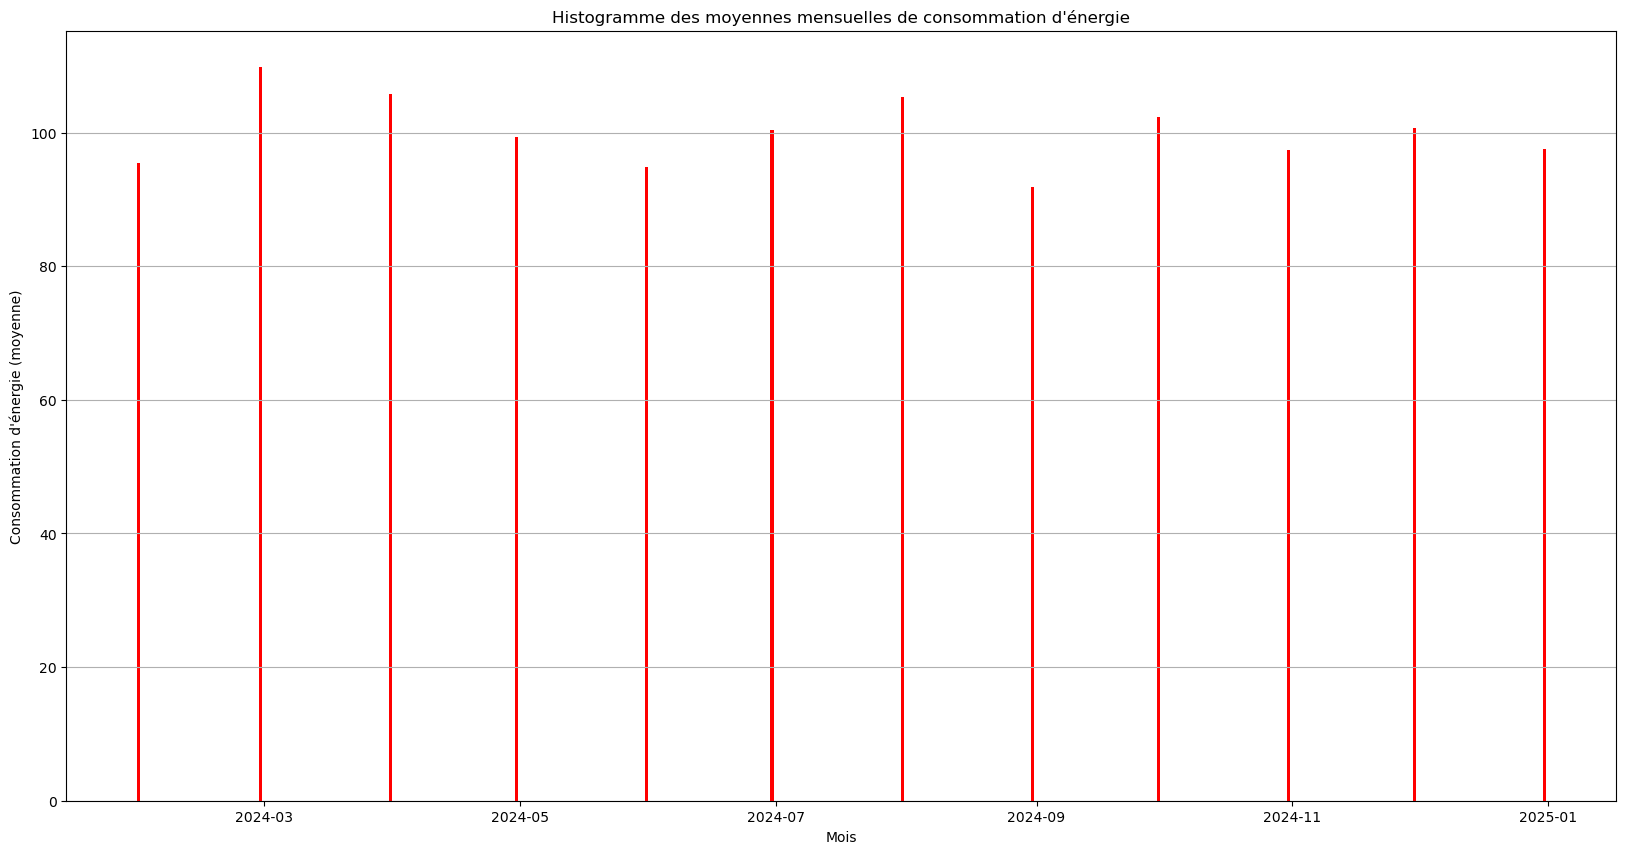

In [88]:
plt.figure(figsize=(20, 10))
plt.bar(monthly_avg_consumption.index, monthly_avg_consumption['Consommation'], color='red')
plt.title('Histogramme des moyennes mensuelles de consommation d\'énergie')
plt.xlabel('Mois')
plt.ylabel('Consommation d\'énergie (moyenne)')
plt.grid(axis='y')
plt.show()

In [89]:
Q1=data['Consommation'].quantile(0.25)
Q3=data['Consommation'].quantile(0.75)
IQR=Q3-Q1
born_inf=Q1-1.5*IQR
born_sup=Q3+1.5*IQR
consommation_eleve=data[data['Consommation']>born_sup]
consommation_faible=data[data['Consommation']<born_inf]


In [90]:
print ("les jours avec la consommation d'énergie exceptionnellement faible sont :")
consommation_faible.head()

les jours avec la consommation d'énergie exceptionnellement faible sont :


,Consommation
Date,
2024-05-26,41.915091


In [91]:
def saison(month):
    if month in [12,1,2]:
        return 'hiver'
    elif month in [3,4,5]:
        return 'preintemp'
    elif month in [6,7,8]:
        return 'éte'
    elif month in [9,10,11]:
        return 'automne'

In [92]:
data['saison']=data.index.month.map(saison)
consommation_saisonierre=data.groupby('saison')['Consommation'].mean()

In [100]:
consommation_saisonierre.head()

saison
automne      100.072610
hiver        100.731311
preintemp     99.990495
éte           99.138157
Name: Consommation, dtype: float64

# Analyse des resultas:

Le mois de février se distingue par une consommation d'énergie particulièrement élevée, ce qui s'explique probablement par les températures basses enregistrées en France à cette période, entraînant une utilisation accrue du chauffage et des appareils énergivores.

Quant au 26 mai, une anomalie est observée avec une consommation d'énergie exceptionnellement basse par rapport aux autres jours de l'année. Plusieurs facteurs pourraient contribuer à cette baisse inhabituelle, tels que des conditions météorologiques clémentes, des jours fériés ou des événements particuliers ayant entraîné une réduction de l'activité économique et donc de la demande d'énergie.